In [1]:
import altair as alt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats  as stats

In [2]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

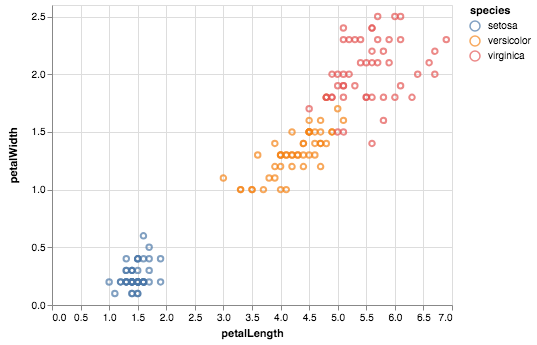

In [3]:
#test that altair is working
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

#### Europe

In [5]:
#load pca projections
data = pd.read_csv('data/eur_test.pca/eur_test.projections', sep=" ", header=None)


In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-9.02553,7.70750,9.79599,-10.73880,-7.197830,-0.449117,-3.927950,-12.53220,-3.186590,17.406800,...,-1.48029,0.593916,-0.321762,0.070711,0.711139,-0.548121,-0.327372,0.272900,0.029801,0
1,-6.05520,4.65931,6.75686,-3.67941,-2.291430,1.447210,-3.517490,-18.88940,-0.589692,-0.297434,...,-7.75296,0.592491,-0.073937,0.023407,0.725072,-0.563961,-0.312331,0.277561,0.029768,0
2,-11.32210,2.81049,2.32179,-14.39320,-4.384990,-2.629490,1.091670,-26.17650,-7.213620,88.785300,...,-1.92820,0.419581,0.121221,-0.034923,0.727533,-0.549335,-0.319029,0.263108,0.029650,0
3,-9.64004,2.61964,17.90490,-5.82657,-5.597990,-6.121550,-1.597790,-17.47060,-6.859830,9.856840,...,-1.59514,0.697600,-0.041004,-0.017145,0.725912,-0.575314,-0.416268,0.287978,0.029914,0
4,-22.81210,-147.23600,-21.18940,4.55140,0.474913,-7.603680,0.405338,6.93561,1.382260,-6.223110,...,-0.28839,-3.361530,-56.657600,0.149974,0.674037,-0.557812,-0.298945,0.272205,0.029795,0


In [7]:
data.shape

(58, 58)

In [9]:
#load sample names
eur=pd.read_csv('data/Eur_names.txt', sep=" ", header=None)

In [10]:
eur.columns=["name"]

In [11]:
eur.head()

,name
0,A1I.sorted
1,A10I.sorted
2,A2I.sorted
3,A8I.sorted
4,B11I.sorted


In [12]:
#add signifant pca to european names
eur["pca"]=data[0]

In [43]:
#load table associating samples to populations
eurPops=pd.read_csv('eur_pops_only.txt', sep="\t")

In [45]:
#rename columns
eurPops.columns=["name", "pop"]

In [46]:
eurPops.head()

,name,pop
0,A10I.sorted,PG
1,G9II.sorted,PG
2,G10I.sorted,PG
3,E8I.sorted,PG
4,E1I.sorted,PG


In [47]:
#merge pops and pca
merged=pd.merge(eurPops, eur, on='name')

In [48]:
merged.head()

,name,pop,pca
0,A10I.sorted,PG,-6.05520
1,G9II.sorted,PG,-1.75168
2,G10I.sorted,PG,-3.28333
3,E8I.sorted,PG,-4.77967
4,E1I.sorted,PG,-5.15043


In [38]:
#bring in geographic coordinates
sites=pd.read_csv('data/sites.txt', sep="\t")

In [39]:
sites.columns=["pop", "con","lat","long"]

In [40]:
sites.head()

,pop,con,lat,long
0,AV,Nam,40.200187,-76.762440
1,BP,Nam,39.645696,-75.718140
2,CB,Nam,43.635190,-79.345760
3,DH,Nam,39.323906,-75.622425
4,DS,Nam,38.641833,-75.445000


In [41]:
sites.shape

(38, 4)

In [49]:
#merge together pops, pcas, geo locations
mergey=pd.merge(merged, sites, on='pop', how='inner')

In [50]:
mergey.head()

,name,pop,pca,con,lat,long
0,A10I.sorted,PG,-6.05520,Eur,43.9475,4.536631
1,G9II.sorted,PG,-1.75168,Eur,43.9475,4.536631
2,G10I.sorted,PG,-3.28333,Eur,43.9475,4.536631
3,E8I.sorted,PG,-4.77967,Eur,43.9475,4.536631
4,E1I.sorted,PG,-5.15043,Eur,43.9475,4.536631


In [51]:
mergey.shape

(58, 6)

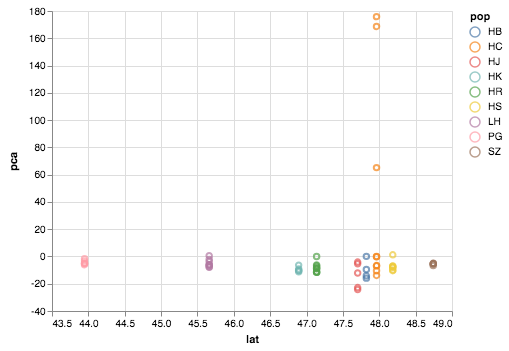

In [52]:
#plot pca vs latitude
alt.Chart(mergey).mark_point().encode(
    alt.X('lat',
        scale=alt.Scale(zero=False)
    ),
    y='pca',
    color='pop'
)

In [53]:
eurX=[]
eurY=[]
eurR2=[]
eurt=[]
eurp=[]
#regression of pca & latitude
X = mergey["lat"]
y = mergey["pca"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()
eurX.append("lat")
eurY.append("pca1")
eurR2.append(model.rsquared)
eurt.append(model.tvalues[0])
eurp.append(model.pvalues[0])



In [54]:
model.pvalues[0]

0.98086380883403768

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pca   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                 0.0005804
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.981
Time:                        10:50:07   Log-Likelihood:                -287.24
No. Observations:                  58   AIC:                             576.5
Df Residuals:                      57   BIC:                             578.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat            0.0023      0.096      0.024      0.981      -0.191       0.195
==============================================================================
Omnibus:                       87.333   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1103.176
Skew:                           4.490   Prob(JB):                    2.81e-240
Kurtosis:                      22.387   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
pcaEurSubset= mergey[["pop","pca"]]

In [57]:
pe=pcaEurSubset.groupby(['pop']).mean()

In [58]:
pe

,pca
pop,
HB,-9.911105
HC,41.285816
HJ,-13.746554
HK,-9.484072
HR,-8.138231
HS,-7.008274
LH,-4.941696
PG,-4.378100
SZ,-5.534038


In [59]:
pe['pop'] = pe.index

In [69]:
traits=pd.read_csv('data/all.csv')

In [70]:
traitSubset= traits[["Population","avg.ft","avg.ht","avg.bn","avg.eh"]]

In [71]:
tt=traitSubset.groupby(['Population']).mean()

In [74]:
tt['pop'] = tt.index

In [75]:
#merge together pops, pcas, geo locations,traits
mergeTraitEur=pd.merge(tt, pe, on='pop', how='inner')

/Users/brechann/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'pop' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
mergeTraitEur

,avg.ft,avg.ht,avg.bn,avg.eh,pop,pca
0,51.500000,64.950000,12.500000,6.075000,HB,-9.911105
1,45.333333,60.066667,12.166667,7.300000,HC,41.285816
2,63.000000,70.080000,12.600000,7.433333,HJ,-13.746554
3,50.380952,65.028571,19.238095,8.718182,HK,-9.484072
4,41.291667,67.975000,15.583333,11.266667,HR,-8.138231
5,48.333333,49.300000,12.666667,4.471429,HS,-7.008274
6,55.157895,74.242105,16.210526,7.710526,LH,-4.941696
7,57.071429,78.300000,15.071429,5.871429,PG,-4.378100
8,43.875000,69.333333,14.785714,6.433333,SZ,-5.534038


In [77]:
traitList=["avg.ft","avg.ht","avg.bn"]

In [78]:
for trait in traitList:
    X = mergeTraitEur[trait]
    y = mergeTraitEur["pca"]

    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model

    # Print out the statistics
    print(trait,"pca")
    print(model.summary())
    
    eurX.append(trait)
    eurY.append("pca1")
    eurR2.append(model.rsquared)
    eurt.append(model.tvalues[0])
    eurp.append(model.pvalues[0])


avg.ft pca
                            OLS Regression Results                            
Dep. Variable:                    pca   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                    0.3156
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.590
Time:                        10:58:58   Log-Likelihood:                -37.485
No. Observations:                   9   AIC:                             76.97
Df Residuals:                       8   BIC:                             77.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg.ft        -0.0606      0.108     -0.5

/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [79]:
eurp

[0.98086380883403768,
 0.58965200698789277,
 0.61662458494071903,
 0.57922199265765695]

In [80]:
eurRegressions = pd.DataFrame(
    {'X': eurX,
     'y': eurY,
     'R2': eurR2,
     't': eurt,
     'p': eurp
    })

In [81]:
eurRegressions

,R2,X,p,t,y
0,0.000010,lat,0.980864,0.024091,pca1
1,0.037953,avg.ft,0.589652,-0.561782,pca1
2,0.032790,avg.ht,0.616625,-0.520778,pca1
3,0.040075,avg.bn,0.579222,-0.577913,pca1


In [82]:
eurRegressions = eurRegressions[['X', 'y','R2','t','p']]

In [83]:
eurRegressions.to_csv("eurRegressions")

#### North America

In [85]:
#load pca projections
namData = pd.read_csv('data/nam.pca/nam.projections', sep=" ", header=None)


In [86]:
namData.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,-79.191400,8.751380,-6.84335,-0.751573,-3.87719,-1.12705,0.625885,-3.66975,-2.03669,29.01690,...,-58.758700,-0.196036,-5.981340,-1.438230,0.088481,0.719688,-0.277022,-0.187384,-0.041276,0
1,0.941211,-3.486890,12.66400,-3.281430,6.34614,8.11526,16.014900,37.83650,-49.03140,-5.29988,...,0.238034,0.237561,0.032412,-0.021254,0.185962,0.340228,-0.242048,-0.148518,-0.040021,0
2,5.478270,0.014892,7.45028,-7.923220,11.36700,-10.30600,27.516100,71.56660,74.33790,-15.56770,...,0.449333,-0.167131,-0.084686,0.129273,0.062149,0.314313,-0.227359,-0.161861,-0.039863,0
3,10.276900,-9.149870,11.54960,-19.835400,1.61265,7.38105,144.954000,-87.10870,6.75545,-9.16808,...,0.870827,-0.032877,-0.587831,0.309631,0.408809,0.362824,-0.237134,-0.163803,-0.039386,0
4,7.342330,-5.140150,-0.31300,-3.043430,4.46008,-7.56290,8.604280,-1.10451,2.44162,2.66750,...,0.351625,0.104303,-0.141220,0.020622,0.021455,0.338938,-0.264998,-0.144123,-0.039272,0


In [87]:
namData.shape

(122, 122)

In [89]:
#load sample names
nam=pd.read_csv('data/Nam_names.txt', sep=" ", header=None)

In [90]:
nam.columns=["name"]

In [91]:
#add signifant pca to european names
nam["pca1"]=namData[0]
nam["pca2"]=namData[1]
nam["pca3"]=namData[2]
nam["pca4"]=namData[3]
nam["pca5"]=namData[4]
nam["pca6"]=namData[5]
nam["pca7"]=namData[6]

In [92]:
nam.head()

,name,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,A11I.sorted,-79.191400,8.751380,-6.84335,-0.751573,-3.87719,-1.12705,0.625885
1,A12I.sorted,0.941211,-3.486890,12.66400,-3.281430,6.34614,8.11526,16.014900
2,A3I.sorted,5.478270,0.014892,7.45028,-7.923220,11.36700,-10.30600,27.516100
3,A4I.sorted,10.276900,-9.149870,11.54960,-19.835400,1.61265,7.38105,144.954000
4,A5I.sorted,7.342330,-5.140150,-0.31300,-3.043430,4.46008,-7.56290,8.604280


In [93]:
nam.shape

(122, 8)

In [95]:
#load table associating samples to populations
namPops=pd.read_csv('data/nam_pops_only.txt', sep=" ", header=None)

In [96]:
namPops.head()

,0,1
0,B10I.sorted,VN
1,B1II.sorted,VN
2,F1II.sorted,MF
3,B8I.sorted,MF
4,D7I.sorted,MF


In [97]:
namPops=namPops.drop_duplicates()

In [98]:
namPops.shape

(118, 2)

In [99]:
#rename columns
namPops.columns=["name", "pop"]

In [100]:
#rename columns
#namPops.columns=["name", "poppy"]

In [101]:
#namPops.head()

In [102]:
#namPops.poppy.unique()

In [103]:
#merge pops and pca
mergedNam=pd.merge(namPops, nam, on='name')

In [104]:
mergedNam.head()

,name,pop,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,B10I.sorted,VN,0.663331,-9.54261,68.81890,105.473000,-33.83340,-8.97886,1.68954
1,B1II.sorted,VN,3.726190,-16.05120,109.58000,166.845000,-53.16170,-16.58730,-6.30719
2,F1II.sorted,MF,2.572260,-5.38557,10.35060,-1.700740,4.45874,7.54970,2.64164
3,B8I.sorted,MF,2.434400,-2.05636,6.34132,0.891581,1.10708,3.40873,9.06460
4,D7I.sorted,MF,1.876800,-4.64664,6.36724,-2.568840,1.28315,4.92449,4.92352


In [105]:
mergedNam.shape

(118, 9)

In [106]:
#merge together pops, pcas, geo locations
mergeyNam=pd.merge(mergedNam, sites, on='pop', how='inner')

In [107]:
mergeyNam.head()

,name,pop,pca1,pca2,pca3,pca4,pca5,pca6,pca7,con,lat,long
0,B10I.sorted,VN,0.663331,-9.54261,68.81890,105.473000,-33.83340,-8.97886,1.68954,Nam,37.920261,-75.476602
1,B1II.sorted,VN,3.726190,-16.05120,109.58000,166.845000,-53.16170,-16.58730,-6.30719,Nam,37.920261,-75.476602
2,F1II.sorted,MF,2.572260,-5.38557,10.35060,-1.700740,4.45874,7.54970,2.64164,Nam,38.407083,-75.568247
3,B8I.sorted,MF,2.434400,-2.05636,6.34132,0.891581,1.10708,3.40873,9.06460,Nam,38.407083,-75.568247
4,D7I.sorted,MF,1.876800,-4.64664,6.36724,-2.568840,1.28315,4.92449,4.92352,Nam,38.407083,-75.568247


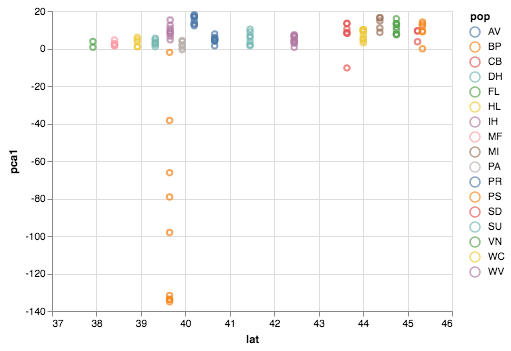

In [108]:
#plot pca vs latitude
alt.Chart(mergeyNam).mark_point().encode(
    alt.X('lat',
        scale=alt.Scale(zero=False)
    ),
    y='pca1',
    color='pop'
)

In [109]:
namX=[]
namY=[]
namR2=[]
namt=[]
namp=[]

In [110]:
pcaList=["pca1","pca2","pca3","pca4","pca5","pca6","pca7"]

In [111]:
for pca in pcaList:
    X = mergeyNam["lat"]
    y = mergeyNam[pca]

    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model

    # Print out the statistics
    print(trait,pca)
    print(model.summary())
    namX.append("lat")
    namY.append(pca)
    namR2.append(model.rsquared)
    namt.append(model.tvalues[0])
    namp.append(model.pvalues[0])

        

avg.bn pca1
                            OLS Regression Results                            
Dep. Variable:                   pca1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                 0.0003843
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.984
Time:                        11:09:38   Log-Likelihood:                -565.99
No. Observations:                 118   AIC:                             1134.
Df Residuals:                     117   BIC:                             1137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat            0.0013      0.065      0.

In [112]:
namp

[0.98439262066396149,
 0.90503812243945858,
 0.16037301152945413,
 0.45346434173657479,
 0.6632321215047724,
 0.57030508140841873,
 0.80135569299505538]

In [113]:
#regression of pca & latitude
X = mergeyNam["lat"]
y = mergeyNam["pca1"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pca1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                 0.0003843
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.984
Time:                        11:09:46   Log-Likelihood:                -565.99
No. Observations:                 118   AIC:                             1134.
Df Residuals:                     117   BIC:                             1137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat            0.0013      0.065      0.020      0.984      -0.127       0.130
==============================================================================
Omnibus:                      118.698   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1137.324
Skew:                          -3.744   Prob(JB):                    1.08e-247
Kurtosis:                      16.238   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

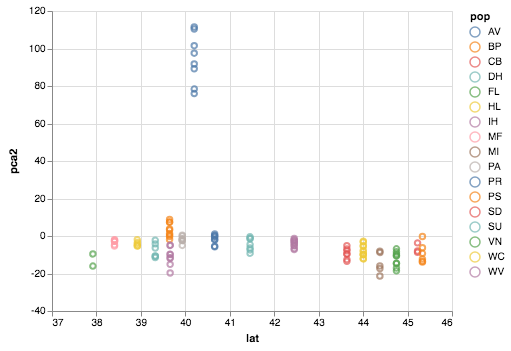

In [114]:
#plot pca vs latitude
alt.Chart(mergeyNam).mark_point().encode(
    alt.X('lat',
        scale=alt.Scale(zero=False)
    ),
    y='pca2',
    color='pop'
)

In [115]:
#regression of pca & latitude
X = mergeyNam["lat"]
y = mergeyNam["pca2"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pca2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.01429
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.905
Time:                        11:09:51   Log-Likelihood:                -552.34
No. Observations:                 118   AIC:                             1107.
Df Residuals:                     117   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat            0.0069      0.058      0.120      0.905      -0.108       0.122
==============================================================================
Omnibus:                      102.774   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.342
Skew:                           3.266   Prob(JB):                    6.70e-144
Kurtosis:                      12.562   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

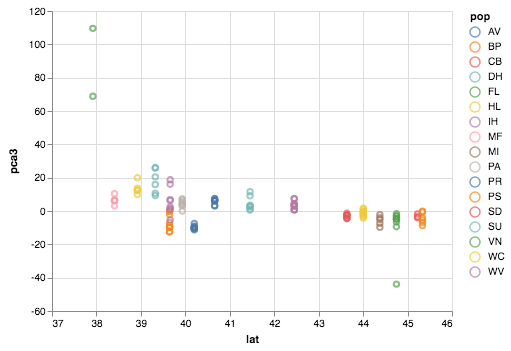

In [116]:
#plot pca vs latitude
alt.Chart(mergeyNam).mark_point().encode(
    alt.X('lat',
        scale=alt.Scale(zero=False)
    ),
    y='pca3',
    color='pop'
)

In [117]:
#regression of pca & latitude
X = mergeyNam["lat"]
y = mergeyNam["pca3"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pca3   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.996
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.160
Time:                        11:09:54   Log-Likelihood:                -484.64
No. Observations:                 118   AIC:                             971.3
Df Residuals:                     117   BIC:                             974.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat            0.0461      0.033      1.413      0.160      -0.019       0.111
==============================================================================
Omnibus:                      134.751   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3600.475
Skew:                           3.886   Prob(JB):                         0.00
Kurtosis:                      28.921   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

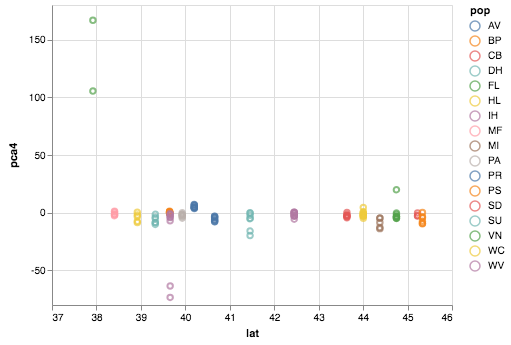

In [118]:
#plot pca vs latitude
alt.Chart(mergeyNam).mark_point().encode(
    alt.X('lat',
        scale=alt.Scale(zero=False)
    ),
    y='pca4',
    color='pop'
)

In [119]:
#regression of pca & latitude
X = mergeyNam["lat"]
y = mergeyNam["pca4"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pca4   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5657
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.453
Time:                        11:10:02   Log-Likelihood:                -525.92
No. Observations:                 118   AIC:                             1054.
Df Residuals:                     117   BIC:                             1057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat           -0.0348      0.046     -0.752      0.453      -0.126       0.057
==============================================================================
Omnibus:                      162.644   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8475.289
Skew:                           4.972   Prob(JB):                         0.00
Kurtosis:                      43.310   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

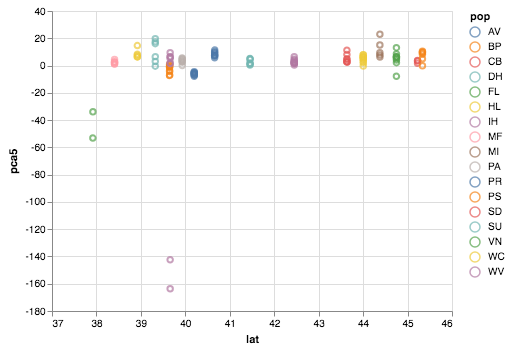

In [120]:
#plot pca vs latitude
alt.Chart(mergeyNam).mark_point().encode(
    alt.X('lat',
        scale=alt.Scale(zero=False)
    ),
    y='pca5',
    color='pop'
)

In [121]:
#regression of pca & latitude
X = mergeyNam["lat"]
y = mergeyNam["pca5"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pca5   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.1906
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.663
Time:                        11:10:05   Log-Likelihood:                -531.41
No. Observations:                 118   AIC:                             1065.
Df Residuals:                     117   BIC:                             1068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat            0.0212      0.048      0.437      0.663      -0.075       0.117
==============================================================================
Omnibus:                      180.190   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8590.228
Skew:                          -6.095   Prob(JB):                         0.00
Kurtosis:                      42.982   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

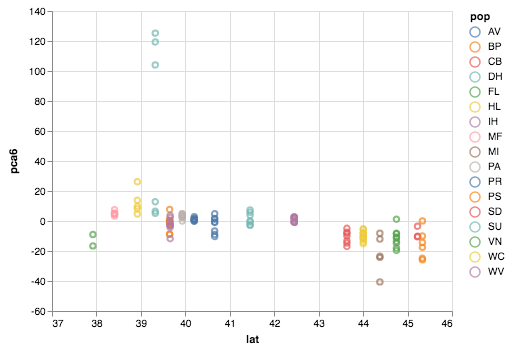

In [122]:
#plot pca vs latitude
alt.Chart(mergeyNam).mark_point().encode(
    alt.X('lat',
        scale=alt.Scale(zero=False)
    ),
    y='pca6',
    color='pop'
)

In [123]:
#regression of pca & latitude
X = mergeyNam["lat"]
y = mergeyNam["pca6"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pca6   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.3240
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.570
Time:                        11:10:09   Log-Likelihood:                -526.76
No. Observations:                 118   AIC:                             1056.
Df Residuals:                     117   BIC:                             1058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat           -0.0265      0.047     -0.569      0.570      -0.119       0.066
==============================================================================
Omnibus:                      139.592   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2817.883
Skew:                           4.304   Prob(JB):                         0.00
Kurtosis:                      25.339   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

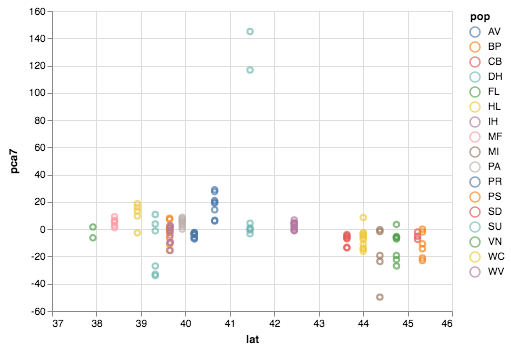

In [124]:
#plot pca vs latitude
alt.Chart(mergeyNam).mark_point().encode(
    alt.X('lat',
        scale=alt.Scale(zero=False)
    ),
    y='pca7',
    color='pop'
)

In [125]:
#regression of pca & latitude
X = mergeyNam["lat"]
y = mergeyNam["pca7"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pca7   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.06359
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.801
Time:                        11:10:13   Log-Likelihood:                -526.21
No. Observations:                 118   AIC:                             1054.
Df Residuals:                     117   BIC:                             1057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat           -0.0117      0.046     -0.252      0.801      -0.104       0.080
==============================================================================
Omnibus:                      138.566   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3542.713
Skew:                           4.104   Prob(JB):                         0.00
Kurtosis:                      28.558   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
pca7Lat=model.summary()

In [127]:
pca7Lat

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pca7   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.06359
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.801
Time:                        11:10:15   Log-Likelihood:                -526.21
No. Observations:                 118   AIC:                             1054.
Df Residuals:                     117   BIC:                             1057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat           -0.0117      0.046     -0.252      0.801      -0.104       0.080
==============================================================================
Omnibus:                      138.566   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3542.713
Skew:                           4.104   Prob(JB):                         0.00
Kurtosis:                      28.558   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
#load table associating samples to populations
traits=pd.read_csv('data/all.csv')

In [130]:
traitSubset= traits[["Population","avg.ft","avg.ht","avg.bn","avg.eh"]]

In [131]:
traitSubset.head()

,Population,avg.ft,avg.ht,avg.bn,avg.eh
0,HR,41.291667,67.975,15.583333,11.266667
1,HR,41.291667,67.975,15.583333,11.266667
2,HR,41.291667,67.975,15.583333,11.266667
3,PB,40.200000,59.900,14.500000,6.345455
4,PB,40.200000,59.900,14.500000,6.345455


In [132]:
tt=traitSubset.groupby(['Population']).mean()

In [133]:
tt['pop'] = tt.index

In [134]:
tt.head()

,avg.ft,avg.ht,avg.bn,avg.eh,pop
Population,,,,,
AV,50.000000,43.900000,8.000000,1.700000,AV
BP,75.875000,110.175000,18.875000,9.550000,BP
CB,60.222222,83.138889,15.388889,8.786364,CB
DF,70.800000,84.400000,12.200000,6.800000,DF
DH,80.642857,101.278571,17.285714,7.466667,DH


In [135]:
mergeyNam.head()

,name,pop,pca1,pca2,pca3,pca4,pca5,pca6,pca7,con,lat,long
0,B10I.sorted,VN,0.663331,-9.54261,68.81890,105.473000,-33.83340,-8.97886,1.68954,Nam,37.920261,-75.476602
1,B1II.sorted,VN,3.726190,-16.05120,109.58000,166.845000,-53.16170,-16.58730,-6.30719,Nam,37.920261,-75.476602
2,F1II.sorted,MF,2.572260,-5.38557,10.35060,-1.700740,4.45874,7.54970,2.64164,Nam,38.407083,-75.568247
3,B8I.sorted,MF,2.434400,-2.05636,6.34132,0.891581,1.10708,3.40873,9.06460,Nam,38.407083,-75.568247
4,D7I.sorted,MF,1.876800,-4.64664,6.36724,-2.568840,1.28315,4.92449,4.92352,Nam,38.407083,-75.568247


In [136]:
pcaSubset= mergeyNam[["pop","pca1","pca2","pca3","pca4","pca5","pca6","pca7"]]

In [137]:
pcaSubset.head()

,pop,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,VN,0.663331,-9.54261,68.81890,105.473000,-33.83340,-8.97886,1.68954
1,VN,3.726190,-16.05120,109.58000,166.845000,-53.16170,-16.58730,-6.30719
2,MF,2.572260,-5.38557,10.35060,-1.700740,4.45874,7.54970,2.64164
3,MF,2.434400,-2.05636,6.34132,0.891581,1.10708,3.40873,9.06460
4,MF,1.876800,-4.64664,6.36724,-2.568840,1.28315,4.92449,4.92352


In [138]:
pp=pcaSubset.groupby(['pop']).mean()

In [139]:
pp

,pca1,pca2,pca3,pca4,pca5,pca6,pca7
pop,,,,,,,
AV,15.236187,94.496838,-9.841200,5.226775,-6.088316,1.025795,-4.463552
BP,-90.933641,3.364959,-6.936900,0.204242,-2.696696,-1.575620,-2.051356
CB,7.406640,-9.307606,-3.071824,-2.521210,5.320643,-10.771249,-7.800923
DH,3.211829,-7.645458,18.039053,-6.229375,10.338989,62.191460,-13.466868
FL,10.999746,-12.304431,-9.078064,-0.607696,4.889222,-11.472929,-10.648373
HL,3.300162,-4.049080,13.695632,-4.128354,8.665770,12.492450,10.982968
IH,4.615134,-4.030973,3.462345,-1.685714,2.780074,0.999002,2.457529
MF,2.408853,-3.310052,6.474955,-0.720358,2.411478,5.060945,5.033175
MI,13.424278,-14.313244,-5.683982,-8.882480,12.271596,-21.704492,-18.962370


In [140]:
tt

,avg.ft,avg.ht,avg.bn,avg.eh,pop
Population,,,,,
AV,50.000000,43.900000,8.000000,1.700000,AV
BP,75.875000,110.175000,18.875000,9.550000,BP
CB,60.222222,83.138889,15.388889,8.786364,CB
DF,70.800000,84.400000,12.200000,6.800000,DF
DH,80.642857,101.278571,17.285714,7.466667,DH
DS,76.944444,111.270588,19.529412,10.627778,DS
FL,48.333333,59.733333,14.500000,5.776923,FL
HB,51.500000,64.950000,12.500000,6.075000,HB
HC,45.333333,60.066667,12.166667,7.300000,HC


In [141]:
pp['pop'] = pp.index

In [142]:
#merge together pops, pcas, geo locations,traits
mergeTraitNam=pd.merge(tt, pp, on='pop', how='inner')

/Users/brechann/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'pop' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [143]:
mergeTraitNam

,avg.ft,avg.ht,avg.bn,avg.eh,pop,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,50.000000,43.900000,8.000000,1.700000,AV,15.236187,94.496838,-9.841200,5.226775,-6.088316,1.025795,-4.463552
1,75.875000,110.175000,18.875000,9.550000,BP,-90.933641,3.364959,-6.936900,0.204242,-2.696696,-1.575620,-2.051356
2,60.222222,83.138889,15.388889,8.786364,CB,7.406640,-9.307606,-3.071824,-2.521210,5.320643,-10.771249,-7.800923
3,80.642857,101.278571,17.285714,7.466667,DH,3.211829,-7.645458,18.039053,-6.229375,10.338989,62.191460,-13.466868
4,48.333333,59.733333,14.500000,5.776923,FL,10.999746,-12.304431,-9.078064,-0.607696,4.889222,-11.472929,-10.648373
5,68.846154,102.000000,16.928571,6.528571,HL,3.300162,-4.049080,13.695632,-4.128354,8.665770,12.492450,10.982968
6,80.300000,101.390000,17.500000,12.116667,MF,2.408853,-3.310052,6.474955,-0.720358,2.411478,5.060945,5.033175
7,52.142857,60.123810,14.400000,7.028571,MI,13.424278,-14.313244,-5.683982,-8.882480,12.271596,-21.704492,-18.962370
8,68.777778,89.941176,13.823529,6.094118,PA,2.019916,-1.812327,4.493750,-2.253724,3.432444,3.160432,4.845489
9,61.200000,80.311111,16.000000,8.600000,PR,4.736116,-1.782002,5.762555,-5.404524,8.345762,-2.480402,17.871836


In [144]:
mergeTraitNam.to_csv("traitsPCAs.txt", sep='\t')

In [145]:
mergeTraitNam.shape

(16, 12)

In [146]:
#you need to check that the acronyms match

In [147]:
mergeTraitNam.corr()

,avg.ft,avg.ht,avg.bn,avg.eh,pca1,pca2,pca3,pca4,pca5,pca6,pca7
avg.ft,1.000000,0.908272,0.495444,0.228583,-0.390303,-0.183917,0.637257,0.451768,-0.376574,0.507002,0.142233
avg.ht,0.908272,1.000000,0.729808,0.438342,-0.514334,-0.425300,0.575778,0.376552,-0.257476,0.409110,0.241479
avg.bn,0.495444,0.729808,1.000000,0.723934,-0.413793,-0.746487,0.388799,0.201435,-0.126927,0.133301,0.181513
avg.eh,0.228583,0.438342,0.723934,1.000000,-0.272561,-0.566291,0.143606,0.110484,0.175437,-0.077968,0.120479
pca1,-0.390303,-0.514334,-0.413793,-0.272561,1.000000,0.034682,0.063239,-0.016156,0.044552,-0.057723,-0.046760
pca2,-0.183917,-0.425300,-0.746487,-0.566291,0.034682,1.000000,-0.227789,-0.047290,-0.036470,0.075548,0.028306
pca3,0.637257,0.575778,0.388799,0.143606,0.063239,-0.227789,1.000000,0.909560,-0.672113,0.092761,0.090165
pca4,0.451768,0.376552,0.201435,0.110484,-0.016156,-0.047290,0.909560,1.000000,-0.669006,-0.173420,-0.034243
pca5,-0.376574,-0.257476,-0.126927,0.175437,0.044552,-0.036470,-0.672113,-0.669006,1.000000,0.185559,0.015693
pca6,0.507002,0.409110,0.133301,-0.077968,-0.057723,0.075548,0.092761,-0.173420,0.185559,1.000000,0.075097


In [148]:
for trait in traitList:
    for pca in pcaList:
        mod=stats.pearsonr(mergeTraitNam[trait], mergeTraitNam[pca])
        print(trait,pca,mod)

avg.ft pca1 (-0.39030346447145992, 0.13501875423647827)
avg.ft pca2 (-0.18391652088256749, 0.49533820355401603)
avg.ft pca3 (0.63725698210809378, 0.0079262487566092357)
avg.ft pca4 (0.45176806530208552, 0.07896976061260344)
avg.ft pca5 (-0.37657411677888886, 0.15052679304813496)
avg.ft pca6 (0.50700226444958862, 0.045026757230573929)
avg.ft pca7 (0.14223336943111806, 0.59925838395007536)
avg.ht pca1 (-0.51433434440783832, 0.0415179680775392)
avg.ht pca2 (-0.42530006060456466, 0.1005321991197132)
avg.ht pca3 (0.57577786040119805, 0.01959577163423672)
avg.ht pca4 (0.37655175965867566, 0.15055298714157161)
avg.ht pca5 (-0.25747620896773205, 0.3356845731327317)
avg.ht pca6 (0.40911047146548535, 0.11560721408597144)
avg.ht pca7 (0.24147923528384069, 0.36758716063161334)
avg.bn pca1 (-0.41379260946237417, 0.11109494771699467)
avg.bn pca2 (-0.74648673750788275, 0.00089467306052211826)
avg.bn pca3 (0.38879922957019547, 0.13666204316562414)
avg.bn pca4 (0.20143486215150203, 0.4544000533115391)


In [149]:
stats.pearsonr(mergeTraitNam['avg.ft'], mergeTraitNam['pca1'])

(-0.39030346447145992, 0.13501875423647827)

In [150]:
traitList=["avg.ft","avg.ht","avg.bn"]
pcaList=["pca1","pca2","pca3","pca4","pca5","pca6","pca7"]

In [151]:
for trait in traitList:
    for pca in pcaList:
        name=trait+pca
        X = mergeTraitNam[trait]
        y = mergeTraitNam[pca]

        model = sm.OLS(y, X).fit()
        predictions = model.predict(X) # make the predictions by the model

        # Print out the statistics
        print(trait,pca)
        print(model.summary())
        namX.append(trait)
        namY.append(pca)
        namR2.append(model.rsquared)
        namt.append(model.tvalues[0])
        namp.append(model.pvalues[0])

avg.ft pca1
                            OLS Regression Results                            
Dep. Variable:                   pca1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                   0.03006
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.865
Time:                        11:11:14   Log-Likelihood:                -73.556
No. Observations:                  16   AIC:                             149.1
Df Residuals:                      15   BIC:                             149.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg.ft        -0.0169      0.098     -0.

/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarnin

avg.bn pca1
                            OLS Regression Results                            
Dep. Variable:                   pca1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                   0.01425
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.907
Time:                        11:11:14   Log-Likelihood:                -73.564
No. Observations:                  16   AIC:                             149.1
Df Residuals:                      15   BIC:                             149.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg.bn        -0.0464      0.389     -0.

/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/brechann/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarnin

In [152]:
namRegressions = pd.DataFrame(
    {'X': namX,
     'y': namY,
     'R2': namR2,
     't': namt,
     'p': namp
    })

In [153]:
namRegressions = namRegressions[['X', 'y','R2','t','p']]

In [154]:
namRegressions.to_csv("namRegressions", index=False)

In [155]:
eurRegressions.to_csv("eurRegressions", index=False)